<a href="https://colab.research.google.com/github/kumar-abhishek/imbalanced-machine-learning-book/blob/chapter-5a/chapter-5a/threshold_computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
# !pip3 install xgboost==1.6.1 imbalanced-learn==0.9.1 seaborn==0.12.1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

## Synthetic data set prep:

## Real world data set

In [4]:
# Abalone dataset, and thyroid dataset
from imblearn.datasets import fetch_datasets

# these datasets are baked into imbalanced-learn
# dataset_list = ['thyroid_sick']

In [32]:
# print class imbalance of each dataset
from collections import Counter
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# data = fetch_datasets()['thyroid_sick']
# y = le.fit_transform(data['target'])
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99],
    class_sep=2,  # how separate the classes are
    random_state=0,
)

print(Counter(y))

Counter({0: 9847, 1: 153})


auc_score:  0.5860122630706436


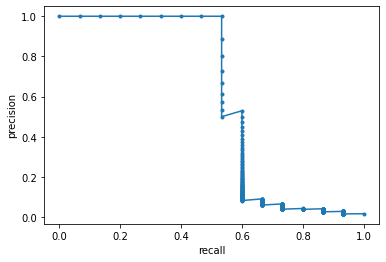

In [39]:
# function to train random forests and evaluate the performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0, stratify=y
)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)
y_pred = y_pred[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pyplot.plot(recall, precision, marker=".", label="LogisticRegression")
pyplot.xlabel("recall")
pyplot.ylabel("precision")
print("auc_score: ", auc(recall, precision))

# Let's try to find the most optimal threshold by optimizing the fscore metric which is defined as the harmonic mean of precision and recall


We try to maximize gmeans

max_fscores_idx:  868  | max(fscore):  0.6956521739130436  | best threshold:  0.8688688688688688
auc_score:  0.5860122630706436


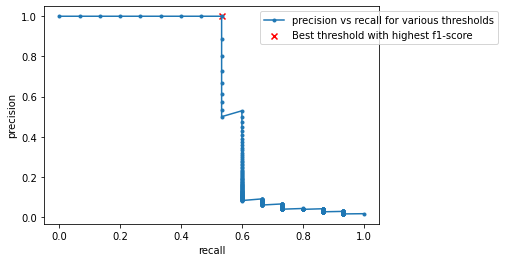

In [65]:
from numpy import argmax

fscore = 2 * precision * recall / (precision + recall)

max_fscore_idx = argmax(fscore)
print(
    "max_fscores_idx: ",
    max_fscore_idx,
    " | max(fscore): ",
    fscore[max_fscore_idx],
    " | best threshold: ",
    thresholds[max_fscore_idx],
)

pyplot.plot(
    recall, precision, marker=".", label="precision vs recall for various thresholds"
)
result = pyplot.scatter(
    recall[max_fscore_idx],
    precision[max_fscore_idx],
    marker="x",
    color="red",
    label="Best threshold with highest f1-score",
)
plt.legend(
    handles=result.legend_elements()[0],
    labels="legend",
    loc="upper center",
    bbox_to_anchor=(1, 1),
)

pyplot.xlabel("recall")
pyplot.ylabel("precision")

print("auc_score: ", auc(recall, precision))

Similarly for precision recall curve, we can optimize the F-score which is the harmonic mean of precision and recall

Let's assume we have a custom metric to optimize, then we can write a custom function to find the threshold that optimizes that metric.

In [50]:
from numpy import arange
from sklearn.metrics import f1_score


def custom_metric(y_test, y_pred_labels):
    return f1_score(y_test, y_pred_labels)


def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype(int)


thresholds = np.linspace(start=0, stop=1, num=len(y_test))

scores = [custom_metric(y_test, to_labels(y_pred, t)) for t in thresholds]
max_score_idx = argmax(scores)

print(
    "max_score_idx=%d, Threshold=%f, F-measure=%f"
    % (max_score_idx, thresholds[max_score_idx], scores[max_score_idx])
)

max_score_idx=93, Threshold=0.093093, F-measure=0.695652
